In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ds_salaries.csv', index_col=0)

In [3]:
display(df.head())
df.info()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [4]:
# define value_count function:

def vc(df, col, r = False):
    """
    First create new_df with index = col given, column count after grouping by col and finally another column
    that is percentage
    
    if r == False (default): prints 1 sentence and shows new_df
    otherwise returns new_df
    
    """
    new_df = df.reset_index().groupby([col]).size().to_frame('count')
    new_df['percentage'] = new_df['count'].div(sum(new_df['count'])).mul(100)
    new_df = new_df.sort_values(by=['percentage'], ascending=False)
    
    if r:
        return new_df
    else:
        print(f'Value counts of columns {col} is')
        display(new_df)

# EDA

# Duplications

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

In [6]:
df[df.duplicated()].head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M


In [7]:
num_dup = len(df[df.duplicated()])
print(f"There are {num_dup} duplicated rows")
df = df.drop_duplicates()
print(f"After dropping duplicates, shape of df is {df.shape}")
display(df.head())

There are 42 duplicated rows
After dropping duplicates, shape of df is (565, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

# Change names to more meaningful words

In [9]:
df['employment_type'].value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [10]:
df = df.replace({'EN': 'Entry level', 'SE': 'Senior level', 'EX':'Expert', 'MI':'Mid level',
           'PT': 'Part-time', 'FT':'Full-time', 'CT':'Contract', 'FL':'Freelance'})

# Choose a style for pyplot

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [12]:
plt.style.use('classic')

# Draw pies

We will draw only columns with few unique values, inluding work_year, experience_level, employment_type, company_size

In [13]:
def pie(df, columns):
    """
    columns is a list of 4 columns
    return: pies corresponding to columns
    """
    fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15,13))
    #fig = plt.gcf()
    #fig.set_size_inches(15,13)
    fig.suptitle('Donut ist lecker',fontsize=15,fontweight='bold')
    
    ind = 0
    for i in range(2):
        for j in range(2):
            target = columns[ind]             # draw this column
            labels = df[target].value_counts().index.tolist()   # the unique values in this col
            data = df[target].value_counts().values.tolist() # the frequencies of values
            
            #sizes = np.rint(df[target].value_counts().values/ df[target].value_counts().values.sum() *100) 
                    # write the above list in percentage form
                
            explode = tuple(np.zeros(len(labels))+0.1) # a tuple of values 0.1, length = # unique values
            
            axes[i,j].pie(data, labels = labels, autopct='%1.1f%%', radius = 2, shadow = True, explode = explode)
            axes[i,j].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            axes[i,j].set_title(target,fontsize=15, fontweight='bold', pad = 0.1)
            
            
            centre_circle = Circle((0,0), 1, fc='white')
            axes[i,j].add_patch(centre_circle)
            
            #plt.tight_layout()
            ind+=1
            
            
    return plt.show()
            

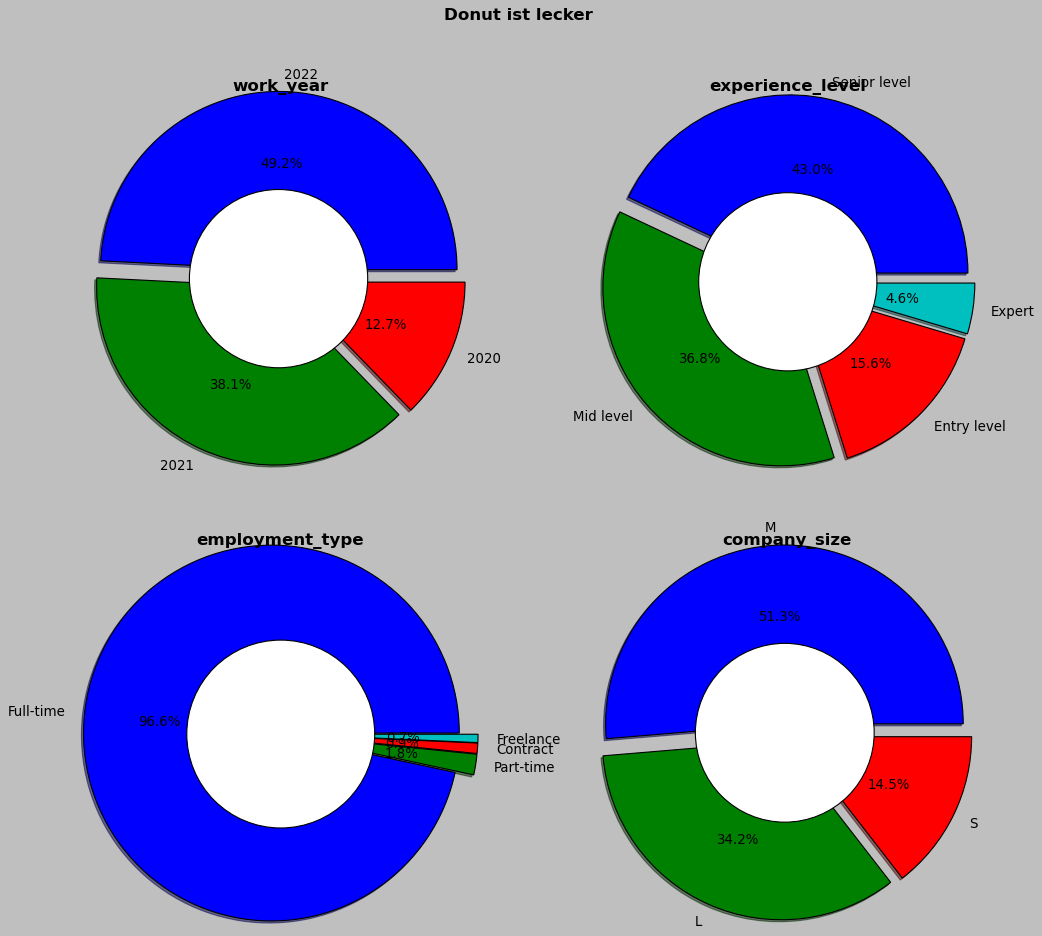

In [14]:
pie(df, ['work_year', 'experience_level','employment_type','company_size'])

# Some values counts

In [15]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [16]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid level,Full-time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [17]:
categorical = ['work_year', 'experience_level', 'employment_type', 'job_title',
               'salary_currency', 'employee_residence',
        'company_location', 'company_size']

In [18]:
vc(df,'work_year')

Value counts of columns work_year is


,count,percentage
work_year,,
2022,278,49.203540
2021,215,38.053097
2020,72,12.743363


In [19]:
for col in categorical:
    vc(df,col)

Value counts of columns work_year is


,count,percentage
work_year,,
2022,278,49.203540
2021,215,38.053097
2020,72,12.743363


Value counts of columns experience_level is


,count,percentage
experience_level,,
Senior level,243,43.008850
Mid level,208,36.814159
Entry level,88,15.575221
Expert,26,4.601770


Value counts of columns employment_type is


,count,percentage
employment_type,,
Full-time,546,96.637168
Part-time,10,1.769912
Contract,5,0.884956
Freelance,4,0.707965


Value counts of columns job_title is


,count,percentage
job_title,,
Data Scientist,130,23.008850
Data Engineer,121,21.415929
Data Analyst,82,14.513274
Machine Learning Engineer,39,6.902655
Research Scientist,16,2.831858
Data Science Manager,12,2.123894
Data Architect,11,1.946903
Big Data Engineer,8,1.415929
Machine Learning Scientist,8,1.415929


Value counts of columns salary_currency is


,count,percentage
salary_currency,,
USD,359,63.539823
EUR,93,16.460177
GBP,43,7.610619
INR,27,4.778761
CAD,18,3.185841
JPY,3,0.530973
PLN,3,0.530973
TRY,3,0.530973
CNY,2,0.353982


Value counts of columns employee_residence is


,count,percentage
employee_residence,,
US,295,52.212389
GB,43,7.610619
IN,30,5.309735
CA,27,4.778761
DE,24,4.247788
FR,18,3.185841
ES,15,2.654867
GR,12,2.123894
JP,7,1.238938


Value counts of columns company_location is


,count,percentage
company_location,,
US,318,56.283186
GB,46,8.141593
CA,28,4.955752
DE,27,4.778761
IN,24,4.247788
FR,15,2.654867
ES,14,2.477876
GR,10,1.769912
JP,6,1.061947


Value counts of columns company_size is


,count,percentage
company_size,,
M,290,51.327434
L,193,34.159292
S,82,14.513274


In [20]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid level,Full-time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Rename Job titles

In [21]:
df = df.replace({'ML Engineer': 'Machine Learning Engineer', 
                   'BI Data Analyst' : 'Big Data Engineer', 
                   'Data Analytics Engineer': 'Data Analyst', 
                   'Head of Machine Learning':'Machine Learning Manager', 
                   'Lead Machine Learning Engineer':'Machine Learning Manager',
                   'Staff Data Scientist':'Data Scientist',
                   'Big Data Architect':'Big Data Engineer',
                   'Data Analytics Lead':'Data Analytics Manager', 
                   'Lead Data Scientist':'Head of Data Science',
                   'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                   'Data Specialist':'Data Scientist',
                   'Marketing Data Analyst':'Data Analyst',
                   'Finance Data Analyst':'Data Analyst',
                   'Financial Data Analyst':'Data Analyst',
                   'Product Data Analyst':'Data Analyst',
                   '3D Computer Vision Researcher':'Computer Vision Engineer',
                   'Computer Vision Software Engineer':'Computer Vision Engineer',
                   'NLP Engineer':'Data Scientist',
                   'Applied Machine Learning Scientist': 'Machine Learning Engineer', 
                   'ETL Developer':'Data Architect','Principal Data Analyst':'Lead Data Analyst'})

In [22]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid level,Full-time,Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [23]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Data Analyst', 'Machine Learning Engineer',
       'Head of Data Science', 'Business Data Analyst',
       'Lead Data Engineer', 'Lead Data Analyst', 'Data Engineer',
       'Data Science Consultant', 'Director of Data Science',
       'Research Scientist', 'Machine Learning Manager',
       'Data Engineering Manager', 'AI Scientist',
       'Computer Vision Engineer', 'Principal Data Scientist',
       'Data Science Manager', 'Head of Data', 'Applied Data Scientist',
       'Cloud Data Engineer', 'Director of Data Engineering',
       'Data Science Engineer', 'Principal Data Engineer',
       'Machine Learning Developer', 'Data Analytics Manager',
       'Data Architect', 'Analytics Engineer'], dtype=object)

In [24]:
superiors = ['Head', 'Lead', 'Manager','Director','Principal']

In [25]:
is_managerial=df['job_title'].str.contains('|'.join(superiors),regex=True)
is_managerial

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Name: job_title, Length: 565, dtype: bool

In [26]:
df['is managerial'] = np.where(is_managerial,True, False)

In [27]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is managerial
0,2020,Mid level,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,2020,Senior level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,False
2,2020,Senior level,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,False
3,2020,Mid level,Full-time,Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,2020,Senior level,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,L,False


In [28]:
# value counts of job_title
vc(df, 'job_title')

Value counts of columns job_title is


,count,percentage
job_title,,
Data Scientist,133,23.539823
Data Engineer,121,21.415929
Data Analyst,92,16.283186
Machine Learning Engineer,52,9.203540
Research Scientist,16,2.831858
Big Data Engineer,15,2.654867
Data Architect,12,2.123894
Data Science Manager,12,2.123894
Computer Vision Engineer,10,1.769912


# Classify categorical and numerical columns:

criterion is >=10

In [29]:
df1 = df.copy()

In [30]:
def get_num_cat_col(df,n):
    """
    n = threshhold
    """
    categorical_cols = []
    numerical_cols = []
    cols = df.columns
    for col in cols:
        unique_values = len(df[col].unique())
        if unique_values <= n:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
            
    return numerical_cols, categorical_cols

In [31]:
num, cat = get_num_cat_col(df1, 10)
print('Numerical columns are:', num, '\n\nCategorical columns are:',cat)

Numerical columns are: ['job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'company_location'] 

Categorical columns are: ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size', 'is managerial']


# One hot encoding

In [42]:
df['salary_currency']

0      EUR
1      USD
2      GBP
3      USD
4      USD
      ... 
602    USD
603    USD
604    USD
605    USD
606    USD
Name: salary_currency, Length: 565, dtype: object

In [48]:
pd.get_dummies(df['salary_currency']).add_prefix(f'{a}_')

NameError: name 'a' is not defined

In [32]:
def one_hot_encode(df, col):
    one_hot = pd.get_dummies(df[col]).add_prefix(f'{col}_')
    df = df.drop(col, axis = 1)
    print(f'one hot encoded {col}')
    df = df.join(one_hot)
    
    return df

In [33]:
# one hot coding for categorical columns
for col in cat:
    df1 = one_hot_encode(df1, col)
    
df1.head()

one hot encoded work_year
one hot encoded experience_level
one hot encoded employment_type
one hot encoded remote_ratio
one hot encoded company_size
one hot encoded is managerial


,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,work_year_2020,work_year_2021,work_year_2022,experience_level_Entry level,...,employment_type_Full-time,employment_type_Part-time,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_size_L,company_size_M,company_size_S,is managerial_False,is managerial_True
0,Data Scientist,70000,EUR,79833,DE,DE,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,Machine Learning Scientist,260000,USD,260000,JP,JP,1,0,0,0,...,1,0,1,0,0,0,0,1,1,0
2,Big Data Engineer,85000,GBP,109024,GB,GB,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,Data Analyst,20000,USD,20000,HN,HN,1,0,0,0,...,1,0,1,0,0,0,0,1,1,0
4,Machine Learning Engineer,150000,USD,150000,US,US,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
